In [287]:
# Import necessary libraries
from dataframe_utils import * # this imports all the functions from our dataframe_utils including all the imports
from plotting_utils import * # this imports all the functions from our plotting_utils
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [288]:
os.getcwd()
# this is a windows command

'/zstorage/hera/Light_dark/Analysis/code'

### The inputs: 

In [347]:
#Dictionary of run name and the starting dpf for each run
experiment_date = '20230622'
box = 'topbox'
setup = 'argos'
period_number = 24
#change the colors dictionary to fit the number of periods for plotting
colors = {1: 'gray',
          2: 'gray',
          3: 'gray',
          4: 'gray',
          5: 'gray',
          6: 'gray', 
          7: 'gray', 
          8: 'lightblue', 
          9: 'lightblue',
          10: 'lightblue',
          11: 'lightblue',
          12: 'lightblue',
          13: 'lightblue',
          14: 'lightblue', 
          15: 'lightblue', 
          16: 'lightblue',
          17: 'lightblue',
          18: 'lightblue',
          19: 'lightblue',
          20: 'gray',
          21: 'gray',
          22: 'gray', 
          23: 'gray', 
          24: 'gray'}


run_dict = {
    '20230622':5,
    '20230623':6,
    '20230624':7,
    '20230625':8,
    '20230626':9,
    '20230627':10 }



##  Creating additional columns

In [348]:
#Saving as a dictionary
df_dict = {}
for run_name, start_age in run_dict.items():
    fn = f'../{run_name}/data/{run_name}.csv'
    df = pd.read_csv(fn)
    df["file_name"] = df["file_name"].astype(str)
    df = add_time_col(df)
    df = add_dpf_col_human_time(df)
    df = add_dayslice_col(df)
    df["time_of_day"] = df["time_of_day"].astype('datetime64[ns]')
    df = assign_day_period(df, period_number)
    df = df[df["confidence"]>= 0.25]
    df['dpf'] = df['dpf'] + start_age
    df_dict[run_name] = df

## Extract ROI column 

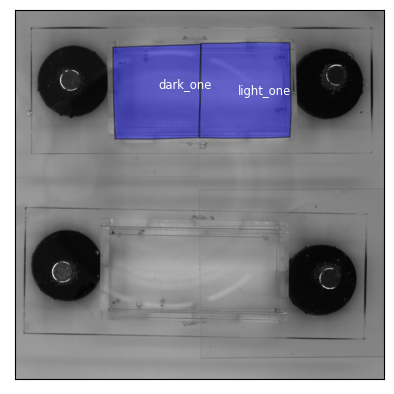

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230622/plots/20230622_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

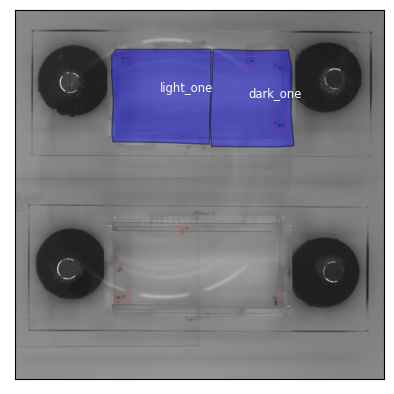

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230623/plots/20230623_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

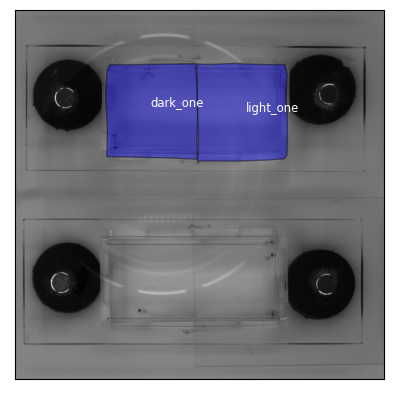

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230624/plots/20230624_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

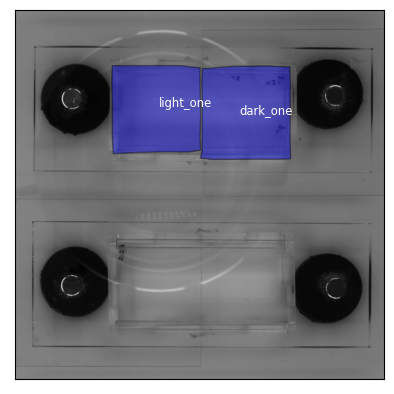

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230625/plots/20230625_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

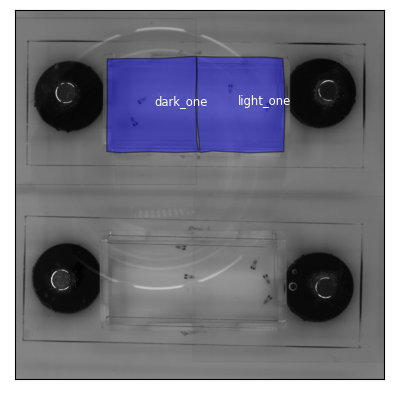

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230626/plots/20230626_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

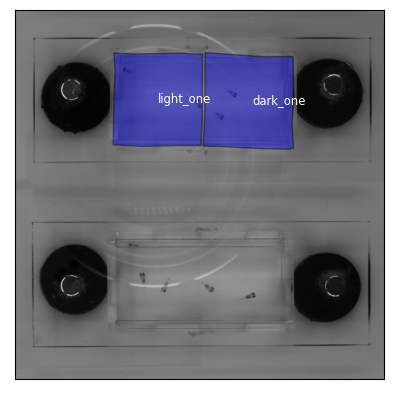

Figure saved to: /zstorage/hera/Light_dark/Analysis/20230627/plots/20230627_topbox_ROI.pdf


<Figure size 640x480 with 0 Axes>

In [349]:
from matplotlib.patches import PathPatch

height, width = (2048, 2048)
for run_name, df in df_dict.items():
    ROI_file_path = f'../{run_name}/data/{run_name}_{box}.json'
    ROI_dict = get_ROI_dict(ROI_file_path)

    reference_frame_path = f'../{run_name}/data/{run_name}_reference_frame.JPEG'
    backgd_img = plt.imread(reference_frame_path) # load background frame to plot ROIs on

    def plot_chambers(backgd_img, polygons_dict):
        fig, ax = plt.subplots(1, 1)
        ax.imshow(backgd_img, cmap='gray')

        for roi_label, roi_polygon in polygons_dict.items():
            patch = PathPatch(roi_polygon, facecolor='blue', lw=1, alpha=0.4)
            ax.text(*np.mean(roi_polygon.vertices, axis=0), roi_label, color='white', size='small')
            ax.add_patch(patch)

        plt.xticks([])
        plt.yticks([])
        plt.show()

    df_dict[run_name] = add_ROI_col(df, width, height, ROI_dict)
        
    figure_path = f'../{run_name}/plots/{run_name}_{box}_ROI.pdf'
    plot_chambers(backgd_img, ROI_dict) # plot the ROIs for this run
    fig = plt.gcf()
    save_figure(fig, figure_path)

In [350]:
concatenated_df = pd.concat(df_dict.values(), ignore_index=True)
concatenated_df

,file_name,file_type,frame,class,xcenter_normalized,ycenter_normalized,width_normalized,height_normalized,confidence,time_of_day,dpf,day_slice,day_period,ROI
0,20230622_110024_010,image_,0,wriggler,0.340576,0.607422,0.027832,0.026367,0.875630,2023-06-22 11:00:24,5,1,12,outside
1,20230622_110024_010,image_,0,wriggler,0.724365,0.225342,0.016113,0.024902,0.713775,2023-06-22 11:00:24,5,1,12,light_one
2,20230622_110024_010,image_,0,wriggler,0.398926,0.792969,0.018555,0.031250,0.839068,2023-06-22 11:00:24,5,1,12,outside
3,20230622_110024_010,image_,0,wriggler,0.353760,0.134521,0.026856,0.052246,0.816852,2023-06-22 11:00:24,5,1,12,dark_one
4,20230622_110024_010,image_,0,wriggler,0.678955,0.617676,0.025879,0.024414,0.809023,2023-06-22 11:00:24,5,1,12,outside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356699,20230628_120023_010,image_,0,wriggler,0.319580,0.774902,0.057129,0.039062,0.888156,2023-06-28 12:00:23,11,3311,13,outside
356700,20230628_120023_010,image_,0,wriggler,0.387695,0.786865,0.034180,0.059082,0.889256,2023-06-28 12:00:23,11,3311,13,outside
356701,20230628_120023_010,image_,0,wriggler,0.333740,0.223389,0.075684,0.027832,0.896621,2023-06-28 12:00:23,11,3311,13,light_one
356702,20230628_120023_010,image_,0,wriggler,0.652344,0.698975,0.044922,0.055176,0.897012,2023-06-28 12:00:23,11,3311,13,outside


In [351]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
concatenated_df.to_csv(f'../results/data/{experiment_date}_{box}_{setup}_{period_number}periods_concatenated_df_{timestamp_now}.csv', index=False)
print("csv saved as" + f'../{experiment_date}_{box}_{setup}_{period_number}periods_concatenated_df_{timestamp_now}.csv') 

csv saved as../20230622_topbox_argos_24periods_concatenated_df_20230718_193335.csv


## Tallying larvae numbers

In [352]:
preference_table = pd.pivot_table(concatenated_df, values='frame', index=['dpf', 'day_period'],
                    columns=['ROI'], aggfunc="count", fill_value=0)
preference_table.reset_index(inplace=True)
preference_table = preference_table.rename_axis(None, axis=1)
preference_table.head(20)

,dpf,day_period,dark_one,light_one,outside
0,5,12,548,819,1230
1,5,13,552,828,972
2,5,14,552,818,983
3,5,15,550,823,925
4,5,16,552,825,958
5,5,17,552,791,1215
6,5,18,552,749,1246
7,5,19,550,823,1276
8,5,20,552,827,1374
9,5,21,505,828,1237


In [353]:
preference_table['total']= preference_table['dark_one']+preference_table['light_one']
preference_table['percentage']= (preference_table['dark_one']/preference_table['total'])*100

In [354]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
preference_table.to_csv(f'../results/data/{experiment_date}_{box}_{setup}_{period_number}periods_preference_table_{timestamp_now}.csv', index=False)
print("csv saved as" + f'../{experiment_date}_{box}_{setup}_{period_number}periods_preference_table_{timestamp_now}.csv') 

csv saved as../20230622_topbox_argos_24periods_preference_table_20230718_193339.csv


In [355]:
# Pre-graphing definitions 
x_labels = preference_table.apply(lambda x: f'{x["dpf"]} - {x["day_period"]}', axis=1)


#### Main Plot

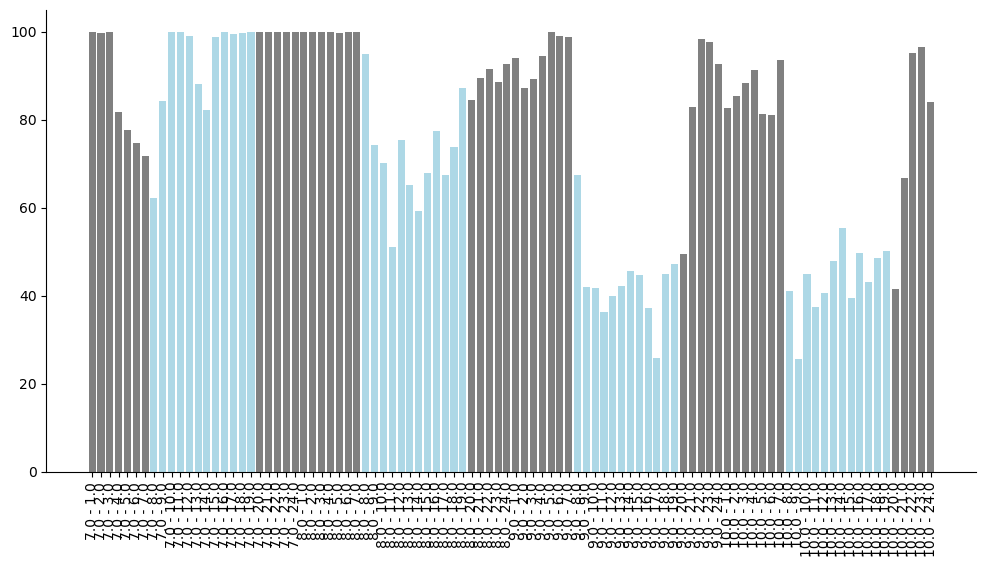

In [360]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.8

dpf_range = range(7, 11)  # Filter dpfs from 7 to 10 (inclusive)

for i, subcat in enumerate(preference_table['day_period'].unique()):
    sub_df = preference_table[(preference_table['day_period'] == subcat) & (preference_table['dpf'].isin(dpf_range))]
    ax.bar(sub_df.index, sub_df['percentage'], color=colors[subcat], label=subcat, width=bar_width)

tick_pos = preference_table[preference_table['dpf'].isin(dpf_range)].index

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(tick_pos)
ax.set_xticklabels(x_labels[tick_pos], rotation=90)

plt.show()


In [368]:
sub_df

,dpf,day_period,dark_one,light_one,outside,total,percentage
47,7,11,1216,0,1373,1216,100.000000
71,8,11,702,671,1269,1373,51.128915
95,9,11,398,698,1380,1096,36.313869
119,10,11,409,683,1389,1092,37.454212


In [357]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_{box}_{setup}_{period_number}periods_day_night_darkpref_{timestamp_now}.png'
fig.savefig(figure_path)
print('Figure saved to:', os.path.abspath(figure_path))

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/20230622_topbox_argos_24periods_day_night_darkpref_20230718_193400.png


#### Day time only

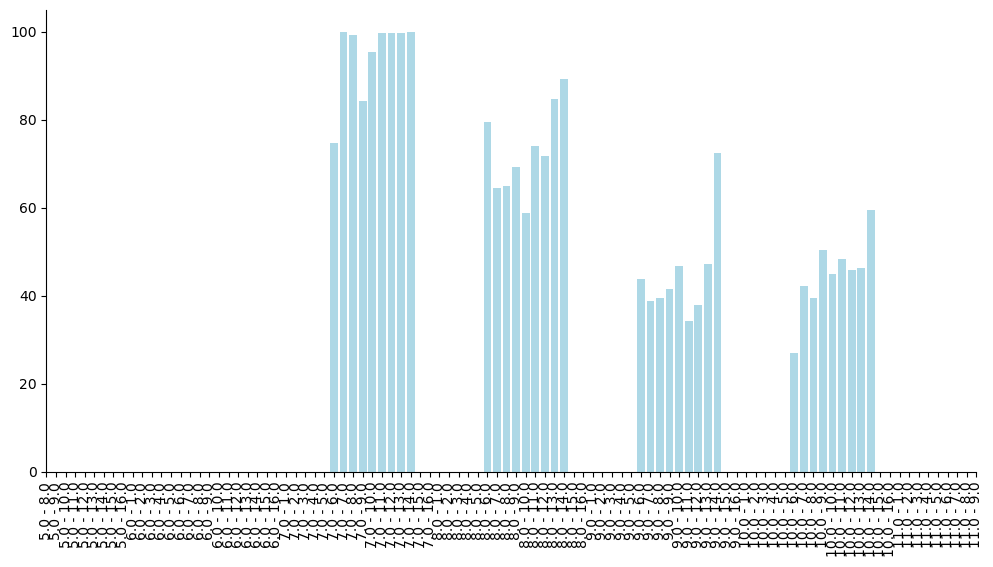

In [198]:

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.8

dpf_range = range(7, 11)           # Filter dpfs from 7 to 10 (inclusive)
day_period_range = range(6, 15)    # Filter day_periods from 6 to 14 (inclusive)

for i, subcat in enumerate(preference_table['day_period'].unique()):
    if subcat in day_period_range:
        sub_df = preference_table[(preference_table['day_period'] == subcat) & (preference_table['dpf'].isin(dpf_range))]
        ax.bar(sub_df.index, sub_df['percentage'], color=colors[subcat], label=subcat, width=bar_width)

tick_pos = preference_table.index

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(tick_pos)
ax.set_xticklabels(x_labels, rotation=90)

plt.show()


In [ ]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_{box}_{setup}_{period_number}periods_dayonly_darkpref_{timestamp_now}.png'
fig.savefig(figure_path)
print('Figure saved to:', os.path.abspath(figure_path))

#### No colour change

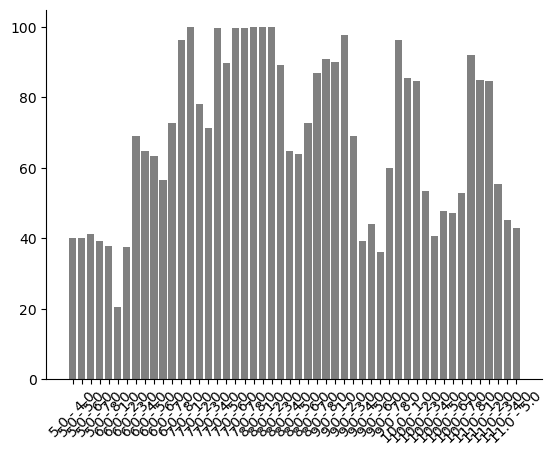

In [138]:
# #plotting the simple graph 
# fig = plt.figure()
# plt.bar(preference_table.index, preference_table['percentage'], color='gray')

# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.xticks(preference_table.index, x_labels, rotation=45)

# # Show the plot
# plt.show()

In [139]:
# timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
# figure_path = f'../results/plots/{experiment_date}_{box}_{setup}_darkpref_{timestamp_now}.pdf'
# fig.savefig(figure_path)
# print('Figure saved to:', os.path.abspath(figure_path))

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/20230622_topbox_argos_darkpref_20230717_160457.pdf


### Additional plotting parameters:

NameError: name 'percentage' is not defined

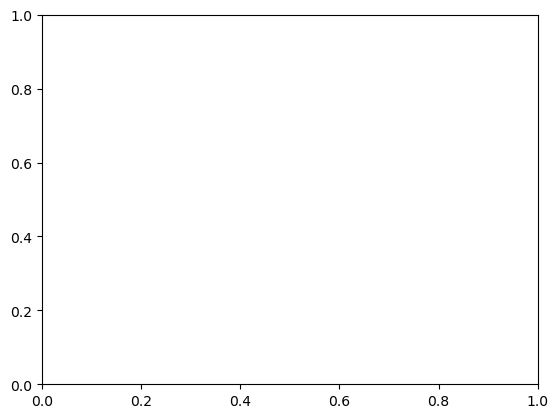

In [26]:
fig, ax = plt.subplots()

ax.bar(percentage, bar_width, label='night', color='black', edgecolor='black')
ax.set_xticks(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_ylabel('Time spent inside shell (frames)')
ax.set_xlabel('Days post fertilisation')
ax.set_title('Mom visits')

plt.show()

#### Visitation total (day and nights)

In [ ]:
# fig, ax = plt.subplots()
# labels = range(max(visitation_counts['dpf'])+1)
# bar_width = 0.8 
# ax.set_xlim(-0.5,12.5)

In [ ]:
range(max(visitation_counts['dpf'])+1)

In [ ]:
# for when day and night counts exist
fig, ax = plt.subplots()

ax.bar(labels, night_counts, bar_width, label='night', color='black', edgecolor='black')
ax.bar(labels, day_counts, bar_width, bottom=night_counts, label='day', color='black', edgecolor='black')
ax.set_xticks(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_ylabel('Time spent inside shell (frames)')
ax.set_xlabel('Days post fertilisation')
ax.set_title('Mom visits')

plt.show()